The Sparks Foundation GRIP TASK 1
# Prediction using Supervised ML - Linear Regression
By: Isaac Dada

![](spark.jpg)

In [38]:
# For EDA and data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For model/prediction
from sklearn import metrics
import statsmodels.api as sm
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
scores = pd.read_csv("scores.csv")
scores.shape

(25, 2)

In [4]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# check for missing values
print(scores.isnull().values.any())

False


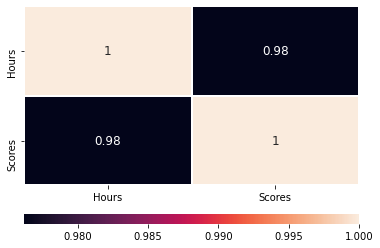

In [6]:
# Show the Pearson's r correlation matrix between the two features
grid_kws = {'height_ratios':(0.9,0.05),'hspace':0.3}
f,(ax,cbar_ax)=plt.subplots(2,gridspec_kw=grid_kws)

corr = scores.corr()

ax= sns.heatmap(corr,annot=True,annot_kws={'fontsize':12},
                linewidths= 1,ax=ax,cbar_ax=cbar_ax,
                cbar_kws={'orientation':'horizontal'})

EDA: The seaborn pairplot shows a linear relationship between the two features even before prediction


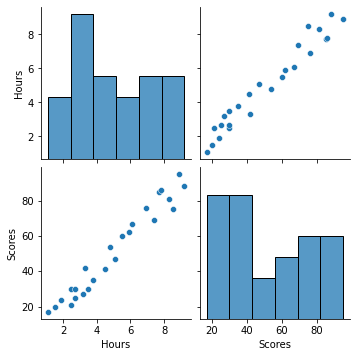

In [7]:
sns.pairplot(scores)

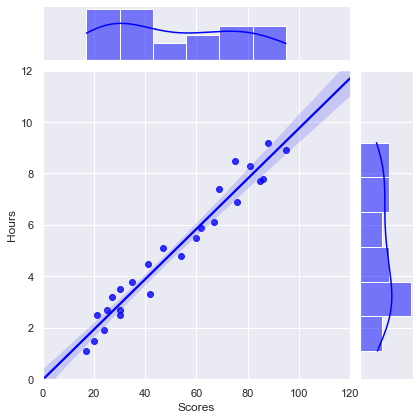

In [8]:
sns.set_theme(style="darkgrid")


graph = sns.jointplot(y="Hours", x="Scores", data=scores,
                  kind="reg", truncate=False,
                  xlim=(0, 120), ylim=(0, 12),
                  color="blue", height=6)

LINEAR REGRESSION MODEL

Standardization is not required for this data set and model as the values of features and output are in the same scale, also it  involves just a single independent variable, hence taking out any issues with multicollinearity among variables


In [9]:
independent = scores[['Hours']]
target = scores[['Scores']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size = 0.3)

In [20]:
# Build model
lr = LinearRegression(fit_intercept = True)
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
# value of predicted score rise by the 'coefficient value' on the value of hours increasing by 1
pd.DataFrame(lr.coef_, independent.columns, columns = ['Coefficient'])

,Coefficient
Hours,9.838604


In [33]:
# value as at Hours = zero
print(f'Intercept: {lr.intercept_}', '\n')

# stats measure of the proportion of variance of target explained by X(Independent variable)
print(f'R-Squared:{lr.score(x_train, y_train)}','\n') 

Intercept: [1.36202434] 

R-Squared:0.9605779700581641 



In [49]:
prediction = lr.predict(x_test)


In [50]:
# Model testing
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, prediction)}', '\n')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, prediction)}', '\n') 


Mean Absolute Error: 5.274849269097322 

Mean Squared Error: 30.74325091434033 



# Test the model to predict what scores would be for 9.25 hours

In [69]:
test_table = test_table['Hours']

SyntaxError: invalid syntax (<ipython-input-69-04527a74d065>, line 1)

In [74]:
Xs = np.array([9.25]).reshape(-1,1)
ys = lr.predict(Xs)
results = pd.DataFrame([9.25], columns = ["Hours"])

C:\Users\dadai\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
Xs

array([[9.25]])

In [62]:

ys

C:\Users\dadai\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92.36911296]])

In [55]:
# Predictd score for hours = 9.25
test = lr.predict([1,9.25])

X = np.array(list(9.25))

y = linear_regression_model.predict([1,9.25])
df = pd.DataFrame([9.25], columns = ["Hours of Study/Day"])
df["Predicted Score"] = y
df

#Expected 2D array, got 1D array instead:
#array=[1.   9.25].
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

C:\Users\dadai\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1.   9.25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

    METHOD 2/3: Using linregress of SciPy (This is because this is a simple univariate regression model)
                OLS (Ordinary least squares), check documentation: https://www.statsmodels.org/stable/index.html

In [23]:
# linregress uses numpy array input for all input values, hence the conversion from df to array
X = np.array(list(independent['Hours']))
y = np.array(list(target['Scores']))

In [24]:
model = sp.stats.linregress(X, y)

In [25]:
print(model)

LinregressResult(slope=9.775803390787473, intercept=2.4836734053731817, rvalue=0.9761906560220887, pvalue=9.132624467459331e-17, stderr=0.45294141201804755)


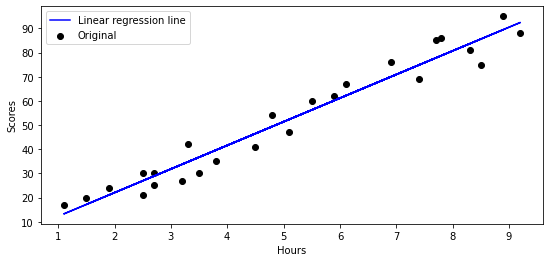

In [26]:
fig, ax=plt.subplots(figsize=(9,4))
ax.scatter(X, y, color='black', label="Original")
ax.plot(X, model.intercept + (model.slope)*X, color="blue", label="Linear regression line")
ax.set_xlabel("Hours")
ax.set_ylabel("Scores")
plt.legend()

THE Ordinary least squares method:

R² would be computed without centering (uncentered) if the model does not contain a constant, hence the next step:

To the simple linear regression, add an intercept term (constant).

In [27]:
X = sm.add_constant(X) 

In [28]:
linear_regression = sm.OLS(y, X)
results = linear_regression.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           9.13e-17
Time:                        17:22:31   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

In [29]:
# Extracting some usefful information frrom the table of results
print('Coefficient of determination:', results.rsquared)
print('Adjusted coefficient of determination:', results.rsquared_adj)
print('Regression coefficients:', results.params)



Coefficient of determination: 0.9529481969048356
Adjusted coefficient of determination: 0.9509024663354806
Regression coefficients: [2.48367341 9.77580339]


In [30]:
print('predicted response:', results.predict(X), sep='\n')

predicted response:
[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]
